<a href="https://colab.research.google.com/github/dwonn201/KaggleStudy/blob/master/NYC_AirBnB_Dataset/2019_NYC_AirBnB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴욕에서 집을 내놓으려 할때 적당한 숙박료 구하기
----------
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 데이터 소개
    - 이번 주제는 Kaggle 내 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID  (listing ID)
    name: 항목의 이름 (타이틀) (name of the listing)
    host_id: 호스트 ID  (host ID)
    host_name: 호스트의 이름  (name of the host)
    neighbourhood_group:방이 있는 지역 그룹 (location)
    neighbourhood: 방이 있는 지역 (area)
    latitude: 방이 위치한 위도 (latitude coordinates)
    longitude: 방이 위치한 경도 (longitude coordinates)
    room_type: 방의 종류 (listing space type)
    price: 가격 (미 달러) (price in dollars)
    minimum_nights:최소 숙박 일수 (amount of nights minimum)
    number_of_reviews: 리뷰의 개수  (number of reviews)
    last_review: 마지막 리뷰 일자 (latest review)
    reviews_per_month: 월별 리뷰 개수 (number of reviews per month)
    calculated_host_listings_count: 호스트가 올린 방 개수  (amount of listing per host)
    availability_365: 365일 중 가능한 일수 (number of days when listing is available for booking)

---

## Step 1. 데이터셋 준비하기

### 1. Colab Notebook에 Kaggle API 세팅


In [1]:
import os

# os.environ을 이용하여 Kaggle API Username, Key 세팅
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = '' 


### 2. 데이터 다운로드 및 압축 해제

In [2]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 및 압축 해제
!rm *.*
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.0MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


### 3. data 불러오기


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("AB_NYC_2019.csv")

In [5]:
print(data.shape)
data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
print(data.shape[0], data['id'].nunique(), data['host_id'].nunique())

48895 48895 37457


In [9]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
data[data['last_review'].isna()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


last_review가 null 이면 reviews_per_month도 null 값을 가지고 있는것으로 보임

In [11]:
((data['last_review'].isna()) & (data['reviews_per_month'].isna())).sum()

10052

review가 한번도 달린적이 없다면 'last_review' 와 'reviews_per_month' null 값을 가짐

In [12]:
df = data.copy()

In [13]:
print(df.shape, data.shape)
df.head()

(48895, 16) (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Step 2. EDA 및 데이터 기초 통계 분석


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### 4. 범주형 데이터 분석


In [16]:
cat_cols = df[['neighbourhood_group', 'neighbourhood','room_type']]

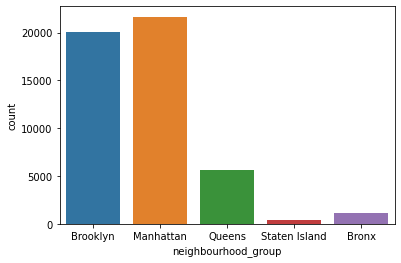

In [17]:
sns.countplot(x = 'neighbourhood_group', data = df)

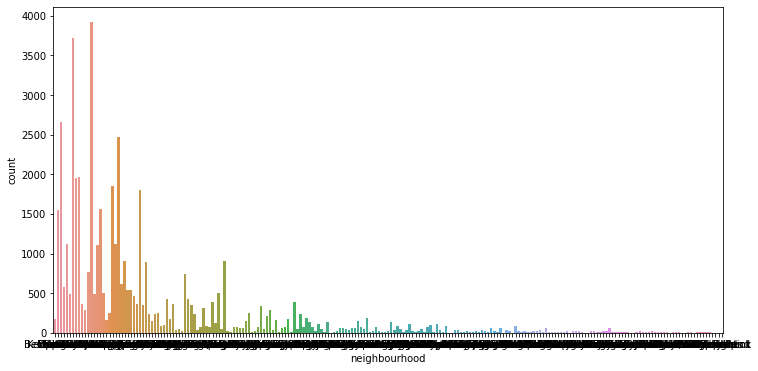

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'neighbourhood', data = df)

In [19]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [20]:
a = df['neighbourhood_group'] +"_"+ df['neighbourhood']
a.value_counts()[:30]

Brooklyn_Williamsburg                 3920
Brooklyn_Bedford-Stuyvesant           3714
Manhattan_Harlem                      2658
Brooklyn_Bushwick                     2465
Manhattan_Upper West Side             1971
Manhattan_Hell's Kitchen              1958
Manhattan_East Village                1853
Manhattan_Upper East Side             1798
Brooklyn_Crown Heights                1564
Manhattan_Midtown                     1545
Manhattan_East Harlem                 1117
Brooklyn_Greenpoint                   1115
Manhattan_Chelsea                     1113
Manhattan_Lower East Side              911
Queens_Astoria                         900
Manhattan_Washington Heights           899
Manhattan_West Village                 768
Manhattan_Financial District           744
Brooklyn_Flatbush                      621
Brooklyn_Clinton Hill                  572
Queens_Long Island City                537
Brooklyn_Prospect-Lefferts Gardens     535
Brooklyn_Park Slope                    506
Brooklyn_Ea

상위 30개 지역이 모두 Brooklyn, Manhattan, Queens 지역임

neighbourhood_group만 사용하거나 neighbourhood 정제 후 사용

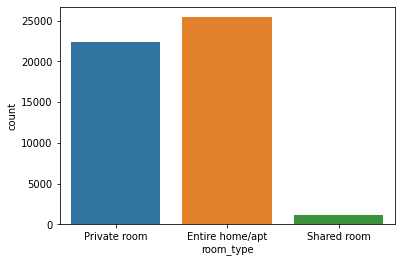

In [21]:
sns.countplot(x = 'room_type', data = df)

### 5. 수치형 데이터 분석

In [22]:
num_cols = df[['price','minimum_nights','number_of_reviews','last_review',
            'reviews_per_month','calculated_host_listings_count','availability_365']]

(array([2.1877e+04, 1.7233e+04, 5.8670e+03, 1.9300e+03, 7.5300e+02,
        3.7600e+02, 2.2300e+02, 1.6200e+02, 1.0100e+02, 7.5000e+01,
        7.1000e+01, 2.0000e+01, 2.3000e+01, 1.1000e+01, 8.0000e+00,
        2.9000e+01, 5.0000e+00, 1.2000e+01, 4.0000e+00, 5.0000e+00,
        2.5000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.3000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
        8.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

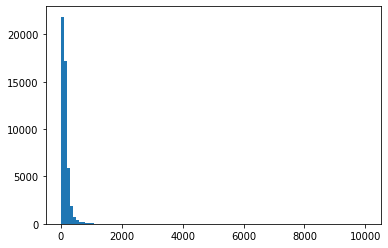

In [23]:
plt.hist(x = 'price', bins = 100, data = num_cols)

(array([4.2433e+04, 1.3790e+03, 4.5640e+03, 6.6000e+01, 1.2400e+02,
        1.5000e+01, 1.3000e+01, 1.2700e+02, 5.0000e+00, 3.2000e+01,
        3.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00, 5.0000e+01,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 3.2000e+01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

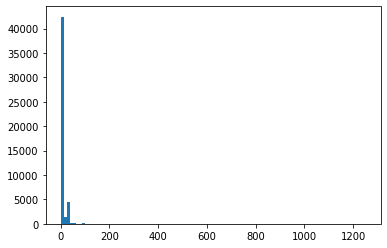

In [24]:
plt.hist(x = 'minimum_nights', bins = 100, data = num_cols)

(array([1.2720e+04, 1.1696e+04, 7.9990e+03, 3.3030e+03, 3.0340e+03,
        7.5200e+02, 2.0580e+03, 1.3000e+02, 8.0000e+01, 4.8300e+02,
        3.3000e+01, 9.1000e+01, 5.4000e+01, 5.6200e+02, 2.7900e+02,
        1.8000e+01, 1.4000e+01, 2.8000e+01, 8.0000e+00, 0.0000e+00,
        2.2300e+02, 1.3500e+02, 8.0000e+00, 8.0000e+00, 1.4000e+01,
        8.2000e+01, 1.6000e+01, 1.7000e+01, 2.0300e+02, 3.4000e+02,
        3.7600e+03, 2.0100e+02, 8.0000e+00, 2.0000e+00, 0.0000e+00,
        1.5000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  , 20.95, 21.9 , 22.85, 23.8 , 24.75, 25.7 ,
        26.65, 27.6 , 28.55, 29.5 , 30.45, 31.4 , 32.35, 33.3 , 34.25,
        35.2 , 36.15, 37.1 , 38.05, 39.  ]),
 <a list of 40 Patch objects>)

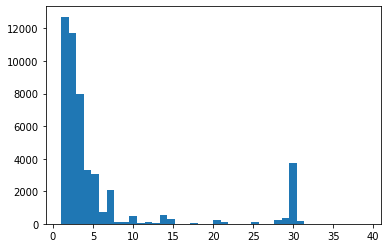

In [25]:
min_night = num_cols[num_cols['minimum_nights']<40]
plt.hist(x = 'minimum_nights', bins = 40, data = min_night)

In [26]:
min_nigts = pd.DataFrame(num_cols['minimum_nights'].value_counts()).reset_index().rename(columns = {'index':'minimum_nights', 'minimum_nights' : 'cnts'}).sort_values('minimum_nights', ascending=True)
tot_min_nigts = sum(min_nigts['cnts'])
min_nigts['ratio'] = min_nigts['cnts'] / tot_min_nigts

cum_r = []
cr = 0

for i in min_nigts['ratio']:
  cr += i
  cum_r.append(cr)

min_nigts['cum_ratio'] = cum_r


min_nigts.head(30)

,minimum_nights,cnts,ratio,cum_ratio
0,1,12720,0.260149,0.260149
1,2,11696,0.239206,0.499356
2,3,7999,0.163595,0.662951
4,4,3303,0.067553,0.730504
5,5,3034,0.062051,0.792555
7,6,752,0.015380,0.807935
6,7,2058,0.042090,0.850026
16,8,130,0.002659,0.852684
21,9,80,0.001636,0.854320
9,10,483,0.009878,0.864199


최소 숙박 일수는 1일에 가장 많고, 2일 이하가 50%.   
30일 이하가 약 98.5%.
즉 한달 넘는 장기 투숙자들은 1.5%에 불과함.  
binning을 통한 최소 숙박 일수 grouping 필요할것으로 보임

(array([1.7991e+04, 6.1500e+03, 3.4210e+03, 2.9750e+03, 2.2770e+03,
        1.8620e+03, 1.3710e+03, 9.0500e+02, 6.4800e+02, 3.7800e+02,
        2.6900e+02, 1.6600e+02, 1.2800e+02, 8.4000e+01, 5.1000e+01,
        4.6000e+01, 3.1000e+01, 2.5000e+01, 1.4000e+01, 1.1000e+01,
        1.0000e+01, 2.0000e+00, 1.1000e+01, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

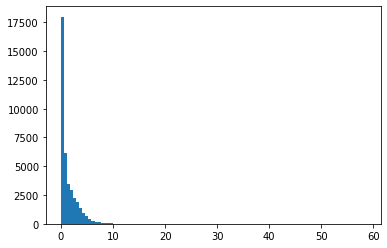

In [27]:
plt.hist(x = 'reviews_per_month', bins = 100, data = num_cols)

In [28]:
rpm = pd.DataFrame(num_cols['reviews_per_month'].fillna(0.0).value_counts()).reset_index().rename(columns = {'index':'reviews_per_month', 'reviews_per_month' : 'cnts'}).sort_values('reviews_per_month', ascending=True)
tot_rpm = sum(rpm['cnts'])
rpm['ratio'] = rpm['cnts'] / tot_rpm
cum_r = []
cr = 0

for i in rpm['ratio']:
  cr += i
  cum_r.append(cr)

rpm['cum_ratio'] = cum_r

rpm50 = rpm[rpm['cum_ratio'] >= 0.50]['reviews_per_month'].min()
rpm90 = rpm[rpm['cum_ratio'] >= 0.90]['reviews_per_month'].min()
rpm95 = rpm[rpm['cum_ratio'] >= 0.95]['reviews_per_month'].min()
rpm99 = rpm[rpm['cum_ratio'] >= 0.99]['reviews_per_month'].min()

print(rpm50, rpm90, rpm95, rpm99)

0.37 3.25 4.31 6.8


월별 약 50%가 0.37회 리뷰가 달리며, 상위 10%가 월 평균 3.25회, 상위5%가 4.31회, 상위1%가 6.8회 리뷰가 달림.

In [29]:
host_list_cnts = pd.DataFrame(num_cols['calculated_host_listings_count'].fillna(0.0).value_counts()).reset_index().rename(columns = {'index':'calculated_host_listings_count', 'calculated_host_listings_count' : 'cnts'}).sort_values('calculated_host_listings_count', ascending=True)
tot_host_list_cnts = sum(host_list_cnts['cnts'])
host_list_cnts['ratio'] = host_list_cnts['cnts'] / tot_host_list_cnts
cum_r = []
cr = 0

for i in host_list_cnts['ratio']:
  cr += i
  cum_r.append(cr)

host_list_cnts['cum_ratio'] = cum_r

host_list_cnts50 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.50]['calculated_host_listings_count'].min()
host_list_cnts90 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.90]['calculated_host_listings_count'].min()
host_list_cnts95 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.95]['calculated_host_listings_count'].min()
host_list_cnts99 = host_list_cnts[host_list_cnts['cum_ratio'] >= 0.99]['calculated_host_listings_count'].min()

print(host_list_cnts50, host_list_cnts90, host_list_cnts95, host_list_cnts99)
host_list_cnts

1 5 15 232


,calculated_host_listings_count,cnts,ratio,cum_ratio
0,1,32303,0.660661,0.660661
1,2,6658,0.136169,0.796830
2,3,2853,0.058350,0.855179
3,4,1440,0.029451,0.884630
4,5,845,0.017282,0.901912
5,6,570,0.011658,0.913570
7,7,399,0.008160,0.921730
6,8,416,0.008508,0.930238
9,9,234,0.004786,0.935024
11,10,210,0.004295,0.939319


전체 66% 호스트가 1인 1개 방을 등록하며, 상위 10%가 5개, 상위 5%가 15개 상위 1%가 232개 방을 등록함

In [30]:
avilability = pd.DataFrame(num_cols['availability_365'].fillna(0.0).value_counts()).reset_index().rename(columns = {'index':'availability_365', 'availability_365' : 'cnts'}).sort_values('availability_365', ascending=True)
tot_avilability = sum(avilability['cnts'])
avilability['ratio'] = avilability['cnts'] / tot_avilability
cum_r = []
cr = 0

for i in avilability['ratio']:
  cr += i
  cum_r.append(cr)

avilability['cum_ratio'] = cum_r

avilability50 = avilability[avilability['cum_ratio'] >= 0.50]['availability_365'].min()
avilability90 = avilability[avilability['cum_ratio'] >= 0.90]['availability_365'].min()
avilability95 = avilability[avilability['cum_ratio'] >= 0.95]['availability_365'].min()
avilability99 = avilability[avilability['cum_ratio'] >= 0.99]['availability_365'].min()

print(avilability50, avilability90, avilability95, avilability99)
avilability.head()

45 337 359 365


,availability_365,cnts,ratio,cum_ratio
0,0,17533,0.358585,0.358585
3,1,408,0.008344,0.366929
9,2,270,0.005522,0.372451
6,3,306,0.006258,0.378709
13,4,233,0.004765,0.383475


1년 365일 중 약 45일 활용 가능 일수의 방이 전체의 50%정도이며, 

상위 10%가 337일(연간 약 92%)    
상위 5%가 359일(연간 약 98%)  
상위 1%가 365일(연간 100%)   
활용 가능함.

In [31]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           48895 non-null  int64  
 1   minimum_nights                  48895 non-null  int64  
 2   number_of_reviews               48895 non-null  int64  
 3   last_review                     38843 non-null  object 
 4   reviews_per_month               38843 non-null  float64
 5   calculated_host_listings_count  48895 non-null  int64  
 6   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.6+ MB


In [32]:
df['last_review'] = pd.to_datetime(df['last_review'])


In [33]:
max(df['last_review']), min(df['last_review'])

(Timestamp('2019-07-08 00:00:00'), Timestamp('2011-03-28 00:00:00'))

In [34]:
# 2019년 dataset이나 정확한 기간은 알 수 없음 (2019년 snapshot)
# 때문에 가장 마지막 리뷰일인 2019년 7월 8일 기준으로 가장 마지막 review와 얼마나 차이가 있는지 일수 차이 컬럼 생성
# 리뷰가 한건도 없는 경우 -9999로 설정

from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2019-07-08', date_format)

df['last_review_day_cnts'] = a - df['last_review'] 

In [35]:
df[['last_review','last_review_day_cnts']]

,last_review,last_review_day_cnts
0,2018-10-19,262 days
1,2019-05-21,48 days
2,NaT,NaT
3,2019-07-05,3 days
4,2018-11-19,231 days
...,...,...
48890,NaT,NaT
48891,NaT,NaT
48892,NaT,NaT
48893,NaT,NaT


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   id                              48895 non-null  int64          
 1   name                            48879 non-null  object         
 2   host_id                         48895 non-null  int64          
 3   host_name                       48874 non-null  object         
 4   neighbourhood_group             48895 non-null  object         
 5   neighbourhood                   48895 non-null  object         
 6   latitude                        48895 non-null  float64        
 7   longitude                       48895 non-null  float64        
 8   room_type                       48895 non-null  object         
 9   price                           48895 non-null  int64          
 10  minimum_nights                  48895 non-null  int64     

In [37]:
df['last_review_day_cnts'] = df['last_review_day_cnts'].dt.days

In [38]:
df['last_review_day_cnts']

0        262.0
1         48.0
2          NaN
3          3.0
4        231.0
         ...  
48890      NaN
48891      NaN
48892      NaN
48893      NaN
48894      NaN
Name: last_review_day_cnts, Length: 48895, dtype: float64

In [39]:
df[['last_review','last_review_day_cnts']]

,last_review,last_review_day_cnts
0,2018-10-19,262.0
1,2019-05-21,48.0
2,NaT,NaN
3,2019-07-05,3.0
4,2018-11-19,231.0
...,...,...
48890,NaT,NaN
48891,NaT,NaN
48892,NaT,NaN
48893,NaT,NaN


In [40]:
day_cnts = pd.DataFrame(df['last_review_day_cnts'].value_counts()).reset_index().rename(columns = {'index':'last_review_day_cnts', 'last_review_day_cnts' : 'cnts'}).sort_values('last_review_day_cnts', ascending=True)
tot_day_cnts = sum(day_cnts['cnts'])
day_cnts['ratio'] = day_cnts['cnts'] / tot_day_cnts
cum_r = []
cr = 0

for i in day_cnts['ratio']:
  cr += i
  cum_r.append(cr)

day_cnts['cum_ratio'] = cum_r

day_cnts50 = day_cnts[day_cnts['cum_ratio'] >= 0.50]['last_review_day_cnts'].min()
day_cnts90 = day_cnts[day_cnts['cum_ratio'] >= 0.90]['last_review_day_cnts'].min()
day_cnts95 = day_cnts[day_cnts['cum_ratio'] >= 0.95]['last_review_day_cnts'].min()
day_cnts99 = day_cnts[day_cnts['cum_ratio'] >= 0.99]['last_review_day_cnts'].min()

print(day_cnts50, day_cnts90, day_cnts95, day_cnts99)
day_cnts.head()

50.0 995.0 1277.0 1549.0


,last_review_day_cnts,cnts,ratio,cum_ratio
65,0.0,89,0.002291,0.002291
4,1.0,718,0.018485,0.020776
9,2.0,565,0.014546,0.035322
8,3.0,580,0.014932,0.050254
25,4.0,330,0.008496,0.058749


In [41]:
notnull = df[df['last_review_day_cnts'] >= 0]
day_cnts = pd.DataFrame(notnull['last_review_day_cnts'].value_counts()).reset_index().rename(columns = {'index':'last_review_day_cnts', 'last_review_day_cnts' : 'cnts'}).sort_values('last_review_day_cnts', ascending=True)
tot_day_cnts = sum(day_cnts['cnts'])
day_cnts['ratio'] = day_cnts['cnts'] / tot_day_cnts
cum_r = []
cr = 0

for i in day_cnts['ratio']:
  cr += i
  cum_r.append(cr)

day_cnts['cum_ratio'] = cum_r

day_cnts50 = day_cnts[day_cnts['cum_ratio'] >= 0.50]['last_review_day_cnts'].min()
day_cnts90 = day_cnts[day_cnts['cum_ratio'] >= 0.90]['last_review_day_cnts'].min()
day_cnts95 = day_cnts[day_cnts['cum_ratio'] >= 0.95]['last_review_day_cnts'].min()
day_cnts99 = day_cnts[day_cnts['cum_ratio'] >= 0.99]['last_review_day_cnts'].min()

print(day_cnts50, day_cnts90, day_cnts95, day_cnts99)
day_cnts

50.0 995.0 1277.0 1549.0


,last_review_day_cnts,cnts,ratio,cum_ratio
65,0.0,89,0.002291,0.002291
4,1.0,718,0.018485,0.020776
9,2.0,565,0.014546,0.035322
8,3.0,580,0.014932,0.050254
25,4.0,330,0.008496,0.058749
...,...,...,...,...
1594,2849.0,1,0.000026,0.999897
1576,2850.0,1,0.000026,0.999923
1702,2979.0,1,0.000026,0.999949
1534,2996.0,1,0.000026,0.999974


### 6. 범주형 데이터와 Price간 관계 분석

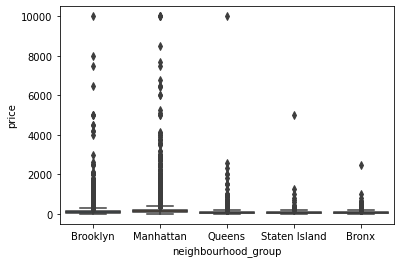

In [42]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df)

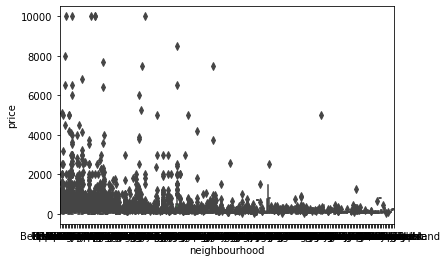

In [43]:
sns.boxplot(x = 'neighbourhood', y = 'price', data = df)

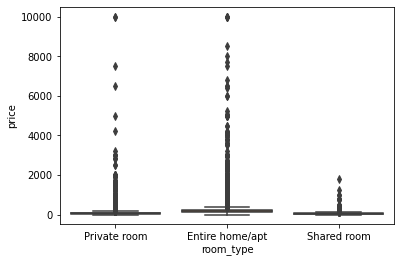

In [44]:
sns.boxplot(x = 'room_type', y = 'price', data = df)

### 7. 수치형 데이터와 Price 간 관계 분석

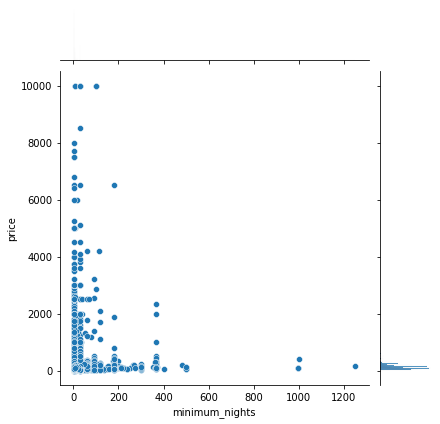

In [45]:
sns.jointplot(x='minimum_nights', y='price', data = df, kind = 'scatter')

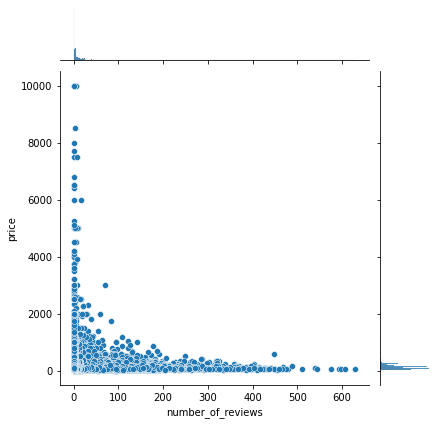

In [46]:
sns.jointplot(x='number_of_reviews', y='price', data = df, kind = 'scatter')

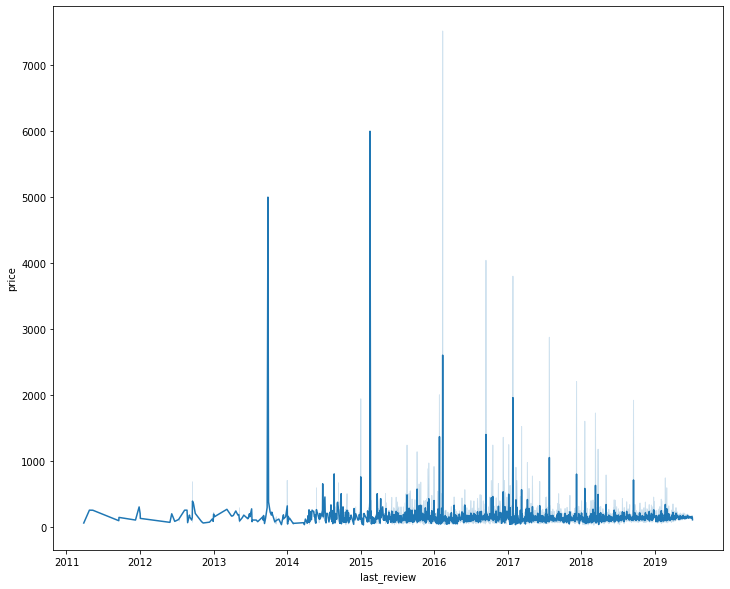

In [47]:
plt.figure(figsize=(12,10))
sns.lineplot(x='last_review', y ='price', data = df)

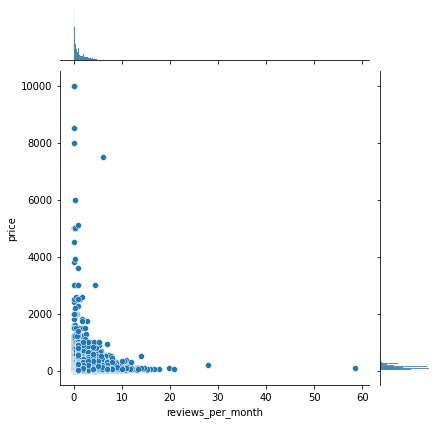

In [48]:
sns.jointplot(x='reviews_per_month', y='price', data = df, kind = 'scatter')

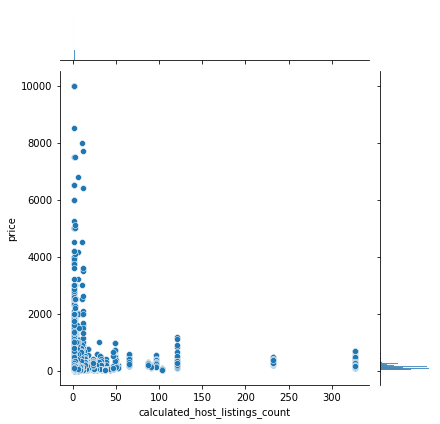

In [49]:
sns.jointplot(x='calculated_host_listings_count', y='price', data = df, kind = 'scatter')

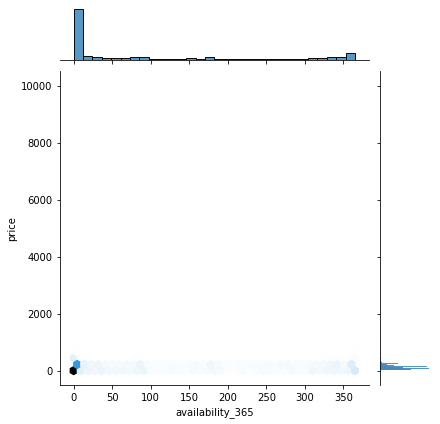

In [50]:
sns.jointplot(x='availability_365', y='price', data = df, kind = 'hex')

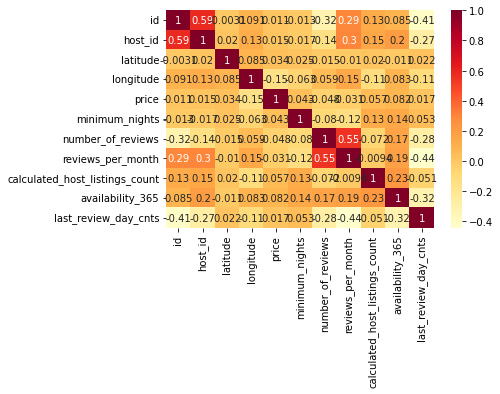

In [51]:
# corr 
sns.heatmap(df.corr(), annot=True, cmap ='YlOrRd')

### 6. 불필요한 데이터 데이터프레임에서 제거하기


In [52]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_day_cnts'],
      dtype='object')

In [53]:
# 불필요컬럼 제거
unneccessary_columns = [
                        'id',                                 #  항목의 ID  (listing ID)
                        'name',                               #  항목의 이름 (타이틀) (name of the listing)
                        #'host_id',                            #  호스트 ID  (host ID)
                        'host_name',                          #  호스트의 이름  (name of the host)
                        #'neighbourhood_group',                #  방이 있는 지역 그룹 (location)
                        #'neighbourhood',                      #  방이 있는 지역 (area)
                        'latitude',                           #  방이 위치한 위도 (latitude coordinates)
                        'longitude',                          #  방이 위치한 경도 (longitude coordinates)
                        #'room_type',                          #  방의 종류 (listing space type)
                        #'price',                              #  가격 (미 달러) (price in dollars)
                        #'minimum_nights',                     #  최소 숙박 일수 (amount of nights minimum)
                        #'number_of_reviews',                  #  리뷰의 개수  (number of reviews)
                        #'last_review',                        #  마지막 리뷰 일자 (latest review)
                        #'reviews_per_month',                  #  월별 리뷰 개수 (number of reviews per month)
                        #'calculated_host_listings_count',     #  호스트가 올린 방 개수  (amount of listing per host)
                        #'availability_365',                   #  365일 중 가능한 일수 (number of days when listing is available for booking)
                        #'last_review_day_cnts'                #  마지막 리뷰로부터 일수
                        ]

In [54]:
n_df = df.drop(unneccessary_columns, axis =1)

In [55]:
## 17개 컬럼에서 11개로 변경
print(df.shape, n_df.shape)

(48895, 17) (48895, 12)


### 7. 수치형 데이터 클리닝

In [56]:
n_df.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day_cnts
count,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,38843.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,276.925418
std,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,413.916984
min,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,15.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,50.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,365.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,3024.000000


**1) price**

price가 0인 값들이 존재. Airbnb는 돈을 받고 집을 빌려주는 곳인데 가격이 0일 수 없음

또한 가장 높은 price가 10,000달러 인데 검색결과 가장 비싼 곳이 1박에 2000달러 정도로 나타남. 

따라서 1박 10,000달러는 잘못된 정보인것으로 보임. 


[뉴욕시티 airbnb 검색](https://www.airbnb.co.kr/s/New-York--New-York--United-States/homes?adults=2&place_id=ChIJOwg_06VPwokRYv534QaPC8g&checkin=2022-03-01&checkout=2022-03-10&tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&query=New%20York%2C%20New%20York%2C%20United%20States&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&source=structured_search_input_header&search_type=user_map_move&price_min=932&ne_lat=40.797051985077054&ne_lng=-73.87944416951626&sw_lat=40.70381060255718&sw_lng=-74.05505375813931&zoom=13&search_by_map=true&federated_search_session_id=d7ebb60b-5cb1-4c80-8e94-18d3b56eadcf&pagination_search=true&items_offset=80&section_offset=2)


In [57]:
min(n_df[n_df['price'] > 0]['price'])

10

In [58]:
print(n_df[n_df['price'] > 0]['price'].quantile(0.99))

799.0


In [59]:
n_df[n_df['price'] > 799]['price']

85        800
496      2000
662       850
762      1300
780       800
         ... 
48304    2999
48305    1999
48523    1369
48535    1749
48839     800
Name: price, Length: 474, dtype: int64

In [60]:
474/48895*100

0.9694242765108907

In [61]:
# 0을 제외하고 가장 낮은 가격이 10불이므로 0은 10불로 대체
# price 상위 1%의 가격은 799달러이고, 전체의 약 0.97%에 불과함으로, 800달러 이상은 모두 800달러로 묶음

def new_price(x):
  if x == 0:
    return 10
  elif x > 799.0:
    return 800.00
  else:
    return x


n_df['price_n'] = n_df['price'].apply(new_price)


In [62]:
n_df[['price','price_n']].describe()

,price,price_n
count,48895.000000,48895.000000
mean,152.720687,143.968177
std,240.154170,121.984612
min,0.000000,10.000000
25%,69.000000,69.000000
50%,106.000000,106.000000
75%,175.000000,175.000000
max,10000.000000,800.000000


**2) minimum_nights**

최소 숙박 일수 최댓값이 1250일인데 365일로 나눠봤을때 약 3.4년으로 계산됨.

보정 필요

In [63]:
print(n_df['minimum_nights'].quantile(0.90))
print(n_df['minimum_nights'].quantile(0.95))
print(n_df['minimum_nights'].quantile(0.99))
print(n_df['minimum_nights'].quantile(0.995))
print(n_df['minimum_nights'].quantile(0.999))

28.0
30.0
45.0
90.0
354.63600000004226


In [64]:
print(len(n_df[n_df['minimum_nights'] >= n_df['minimum_nights'].quantile(0.90)]))
print(len(n_df[n_df['minimum_nights'] >= n_df['minimum_nights'].quantile(0.95)]))
print(len(n_df[n_df['minimum_nights'] >= n_df['minimum_nights'].quantile(0.99)]))
print(len(n_df[n_df['minimum_nights'] >= n_df['minimum_nights'].quantile(0.995)]))
print(len(n_df[n_df['minimum_nights'] >= n_df['minimum_nights'].quantile(0.999)]))

5050
4507
501
301
49


In [65]:
print(5050/48895*100)
print(4507/48895*100)
print(501/48895*100)
print(301/48895*100)
print(49/48895*100)

10.328254422742612
9.217711422435832
1.0246446466918908
0.6156048675733715
0.10021474588403723


최소 숙박 일수 상위 5%가 30일이며, 전체의 약 9%에 해당됨.

30일 이상은 30일로 보정





In [66]:
n_df['minimum_nights_n'] = n_df['minimum_nights'].apply(lambda x : x if x < 30 else 30)

In [67]:
n_df[['minimum_nights','minimum_nights_n']].describe()

,minimum_nights,minimum_nights_n
count,48895.000000,48895.000000
mean,7.029962,5.952776
std,20.510550,8.674476
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,5.000000,5.000000
max,1250.000000,30.000000


**3) availability_365**

1년중 몇일이나 가능한지를 의미하는데 25%가 0일로 나타남

In [68]:
n_df['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [69]:
n_df['availabe_yn'] = n_df['availability_365'].apply(lambda x: 'n' if x == 0 else 'y')

In [70]:
n_df[['availability_365', 'availabe_yn']]

,availability_365,availabe_yn
0,365,y
1,355,y
2,365,y
3,194,y
4,0,n
...,...,...
48890,9,y
48891,36,y
48892,27,y
48893,2,y


1) 결측값

In [71]:
n_df.isna().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
last_review_day_cnts              10052
price_n                               0
minimum_nights_n                      0
availabe_yn                           0
dtype: int64

reviews_per_month가 null 인경우는 review가 한개도 없는 경우이므로 0.  
last_review_day_cnts가 null 인 경우는 reivew 가 한개도 없는 경우이므로 -9999


In [72]:
n_df['reviews_per_month'] = n_df['reviews_per_month'].fillna(0)
n_df['last_review_day_cnts'] = n_df['last_review_day_cnts'].fillna(-9999)

review 여부가 중요할 수 있으므로 review여부 변수 생성

In [73]:
n_df['reviews_yn'] = n_df['last_review'].isna().apply(lambda x: 'n' if x is True else 'y')

In [74]:
n_df[['last_review','reviews_yn']]

,last_review,reviews_yn
0,2018-10-19,y
1,2019-05-21,y
2,NaT,n
3,2019-07-05,y
4,2018-11-19,y
...,...,...
48890,NaT,n
48891,NaT,n
48892,NaT,n
48893,NaT,n


In [75]:
n_df.isna().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
last_review_day_cnts                  0
price_n                               0
minimum_nights_n                      0
availabe_yn                           0
reviews_yn                            0
dtype: int64

last_review 변수는 더이상 사용하지 않을것이므로 제거

In [76]:
df_v2 = n_df.drop(['last_review'], axis = 1)

print(n_df.shape, df_v2.shape)
df_v2.head()

(48895, 16) (48895, 15)


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day_cnts,price_n,minimum_nights_n,availabe_yn,reviews_yn
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,262.0,149.0,1,y,y
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,48.0,225.0,1,y,y
2,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365,-9999.0,150.0,3,y,n
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,3.0,89.0,1,y,y
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,231.0,80.0,10,n,y


### 8. 범주형 데이터 클리닝

앞선 EDA를 통해 확인했을때, neighbourhood를 제외하고는 다 잘 분류가 되어있는것으로 보임.

neighbourhood_group 이 있어 neighbourhood를 제거해도 되지만, 같은 group안에서 가격 차이가 존재할 수 있으므로, 상위 n개만 남기고 나머지는 하나로 묶는 방식으로 진행


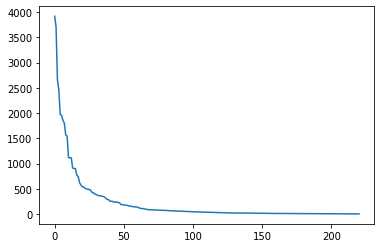

In [77]:
# neighbourhood 의 경우 너무 많은 지역으로 분류가 되어있어 상위 n개만 살리고 나머지는 grouping

neighbour = df_v2['neighbourhood'].value_counts()
plt.plot(range(len(neighbour)), neighbour)

상위 50개 이후로는 큰 변화가 없어보이므로 상위 50개를 제외한 나머지 지역은 기타지역으로 grouping

In [78]:
df_v2['neighbourhood_gr'] = df_v2['neighbourhood'].apply(lambda x: x if str(x) not in neighbour[50:] else 'others')

In [79]:
df_v2['neighbourhood_gr'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

### 9. 데이터 전처리

In [80]:
df_v2.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_day_cnts', 'price_n', 'minimum_nights_n', 'availabe_yn',
       'reviews_yn', 'neighbourhood_gr'],
      dtype='object')

범주형 데이터 더미화

In [81]:
cat_cols = df_v2[[ 'neighbourhood_group','neighbourhood_gr', 'room_type', 'availabe_yn', 'reviews_yn']]

In [82]:
x_dum = pd.get_dummies(cat_cols)

**수치형 데이터 표준화**

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
num_cols = df_v2[['host_id', 'minimum_nights_n', 'number_of_reviews', 'last_review_day_cnts', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

scaler.fit(num_cols)
x_scaled = scaler.transform(num_cols)
x_scaled = pd.DataFrame(x_scaled, columns = num_cols.columns, index = num_cols.index)


In [85]:
X = pd.concat([x_dum, x_scaled], axis = 1)
y = df_v2['price_n']

### 10. train test split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [88]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(32759, 70) (32759,) (16136, 70) (16136,)


### 11. Modeling

In [90]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [91]:
rf_reg = RandomForestRegressor(random_state = 1234)
xgb_reg = XGBRegressor(random_state = 1234)
lgbm_reg = LGBMRegressor(random_state = 1234)

In [92]:
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

[11:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(random_state=1234)

### 12. Model 학습 결과 평가

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [109]:
Xs = [X_train, X_test]
ys = [y_train, y_test]

for i in range(2):
  x = Xs[i]
  y = ys[i]

  rf_pred = rf_reg.predict(x)
  xgb_pred = xgb_reg.predict(x)
  lgbm_pred = lgbm_reg.predict(x)

  print("  RF MAE is {:.6f} and   RF RMSE is {:.6f}".format(mean_absolute_error(y,rf_pred), sqrt(mean_squared_error(y,rf_pred))))
  print(" XGB MAE is {:.6f} and  XGB RMSE is {:.6f}".format(mean_absolute_error(y,xgb_pred), sqrt(mean_squared_error(y,xgb_pred))))
  print("LGBM MAE is {:.6f} and LGBM RMSE is {:.6f}".format(mean_absolute_error(y,lgbm_pred), sqrt(mean_squared_error(y,lgbm_pred))))
  print(" ")

  RF MAE is 20.094235 and   RF RMSE is 35.747933
 XGB MAE is 53.881808 and  XGB RMSE is 94.462213
LGBM MAE is 49.001241 and LGBM RMSE is 85.328431
 
  RF MAE is 53.286152 and   RF RMSE is 93.017144
 XGB MAE is 54.414220 and  XGB RMSE is 94.320004
LGBM MAE is 51.649941 and LGBM RMSE is 90.454534
 


In [104]:
def eval(x, y):
  rf_pred = rf_reg.predict(x)
  xgb_pred = xgb_reg.predict(x)
  lgbm_pred = lgbm_reg.predict(x)

  print("  RF MAE is {:.6f} and   RF RMSE is {:.6f}".format(mean_absolute_error(y,rf_pred), sqrt(mean_squared_error(y,rf_pred))))
  print(" XGB MAE is {:.6f} and  XGB RMSE is {:.6f}".format(mean_absolute_error(y,xgb_pred), sqrt(mean_squared_error(y,xgb_pred))))
  print("LGBM MAE is {:.6f} and LGBM RMSE is {:.6f}".format(mean_absolute_error(y,lgbm_pred), sqrt(mean_squared_error(y,lgbm_pred))))

In [105]:
# train set이 얼마나 잘 학습됐는지 확인

eval(X_train, y_train)

  RF MAE is 20.094235 and   RF RMSE is 35.747933
 XGB MAE is 53.881808 and  XGB RMSE is 94.462213
LGBM MAE is 49.001241 and LGBM RMSE is 85.328431


In [106]:
# test set으로 확인

eval(X_test, y_test)

  RF MAE is 53.286152 and   RF RMSE is 93.017144
 XGB MAE is 54.414220 and  XGB RMSE is 94.320004
LGBM MAE is 51.649941 and LGBM RMSE is 90.454534


train set으로 모형을 학습하고 다시 train set으로 평가했을때, RF 모형이 가장 좋은 성능을 냈지만, 

test set으로 모형을 평가했을 경우 LGBM 모형이 가장 높은 성능을 보임. 

### 13. Model 학습 결과 분석

1) 모형 변수 중요도

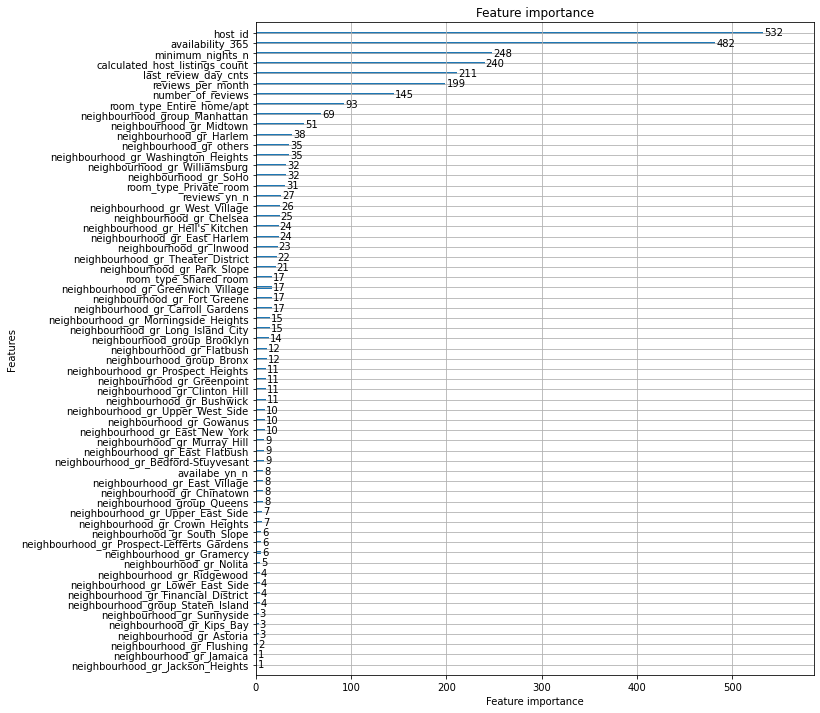

In [100]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_reg, ax=ax)

변수중요도를 봤을때, host_id가 가장 중요한 변수로 나왔고, availability_365, minimum_nights_n, calculated_host_listings_count, last_review_day_cnts, reviews_per_month, number of reviews 순으로 중요한 변수로 나타남.

여기까지 봤을때 지역이 중요한 영향을 끼칠것으로 생각됐으나,  
가격에 중요한 영향을 미치는건 아무래도 host가 아닐까 싶음.  


* host가 집을 얼마나 자주 렌트하는지(사실상 전업 임대업자인지)(availability_365, calculated_host_listings_count),   
* 소비자가 이용하기 쉬운지(minimum_nights_n),  
* 리뷰 관리는 하는지(last_review_day_cnts, reviews_per_month, number of reviews)  

에 따라 가격 결정에 중요한 영향을 끼치는것 같음.



2) 실제 값과 추측값의 관계

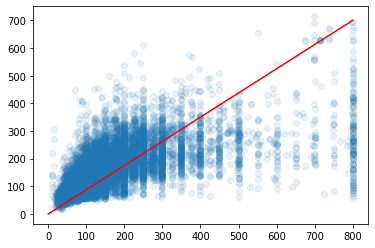

In [113]:
plt.scatter(x = y_test, y = lgbm_pred, alpha = 0.1)
plt.plot([0,800],[0,700], 'r-')

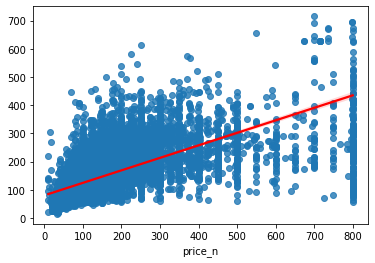

In [114]:
sns.regplot(x = y_test, y = lgbm_pred, line_kws={"color": "red"})

graph로 봤을때 price가 500이 넘어가면 under estimate 하는 경향이 있는것으로 보임.

가격이 많아 질수록 가격대에서 한줄로 분포가 되어있는것을 볼 수 있는데 (ex. price_n 500, 600, 700), 범주형 변수들이 많이 작용해서 그런것으로 보임.

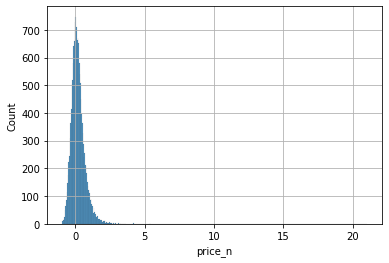

In [115]:
## 히스토그램으로 확인

error = (lgbm_pred - y_test) / y_test
sns.histplot(error)
plt.grid()

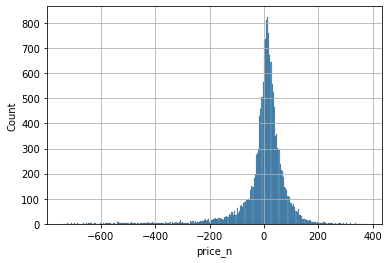

In [116]:
error2 = lgbm_pred - y_test
sns.histplot(error2)
plt.grid()

에러 분포로도 under estimate을 더 많이 하는것으로 볼 수 있음

### 추후 과제 및 결론 

좀 더 심화 분석을 하게된다면,
1. name 변수에 특이한 단어를 포함하고 있는 경우가 있음. ex) central park, harlem, trendy 등  
이러한 변수를 분석 해보면 더 정확한 가격을 예측할 수 있을것으로 생각됨.
2. 위도 경도와 neighbor, neighbor_group을 엮어서 보다 정확한 지역 변수를 만들면 도움이 될것같음.
3. Hyperparameter tunning을 통해 최적의 parameter를 찾게 된다면 더 정확한 숙박료를 예측 할 수 있을것으로 보임

결론 : Airbnb 데이터를 사용하여 숙박료 모델링을 진행했는데, 정확한 가격 예측에는 약간 어려움이 존재했음. 그래도 더 정확한 예측을 할 수 있을 것 같은 여지는 남아있는것 같음.